# Objective
 Here, we'll explore a classification problem, try our hands on dimensionality reduction using Principal Component Analysis and some classification algorithms, try to improve these classifiers using hyperparameter tuning and in the end build an ensemble model to get a high accuracy score along with high precision and recall

In [37]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [38]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #
import seaborn as sns  #
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [23]:
dataset = pd.read_csv('data.csv')
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [24]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

('This dataset contains ', 569, 'rows')
('This dataset contains ', 33, 'columns')


In [25]:

# Creating a Binary Target Column to allow us to do Later Modelling and Plotting

dataset['Target'] = dataset['diagnosis'].map({'B':0, 'M':1})

In [9]:
dataset.shape

(569, 34)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [15]:
M=dataset.loc[dataset['diagnosis']=='M',:]
M.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [16]:
B=dataset.loc[dataset['diagnosis']=='B',:]
B.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


In [17]:
M=M.drop(['diagnosis'],axis=1)
B=B.drop(['diagnosis'],axis=1)

In [26]:
dataset=dataset.drop(['id','Unnamed: 32'], axis=1)
dataset.columns

Index([u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Target'],
      dtype='object')

ValueError: num must be 1 <= num <= 30, not 31

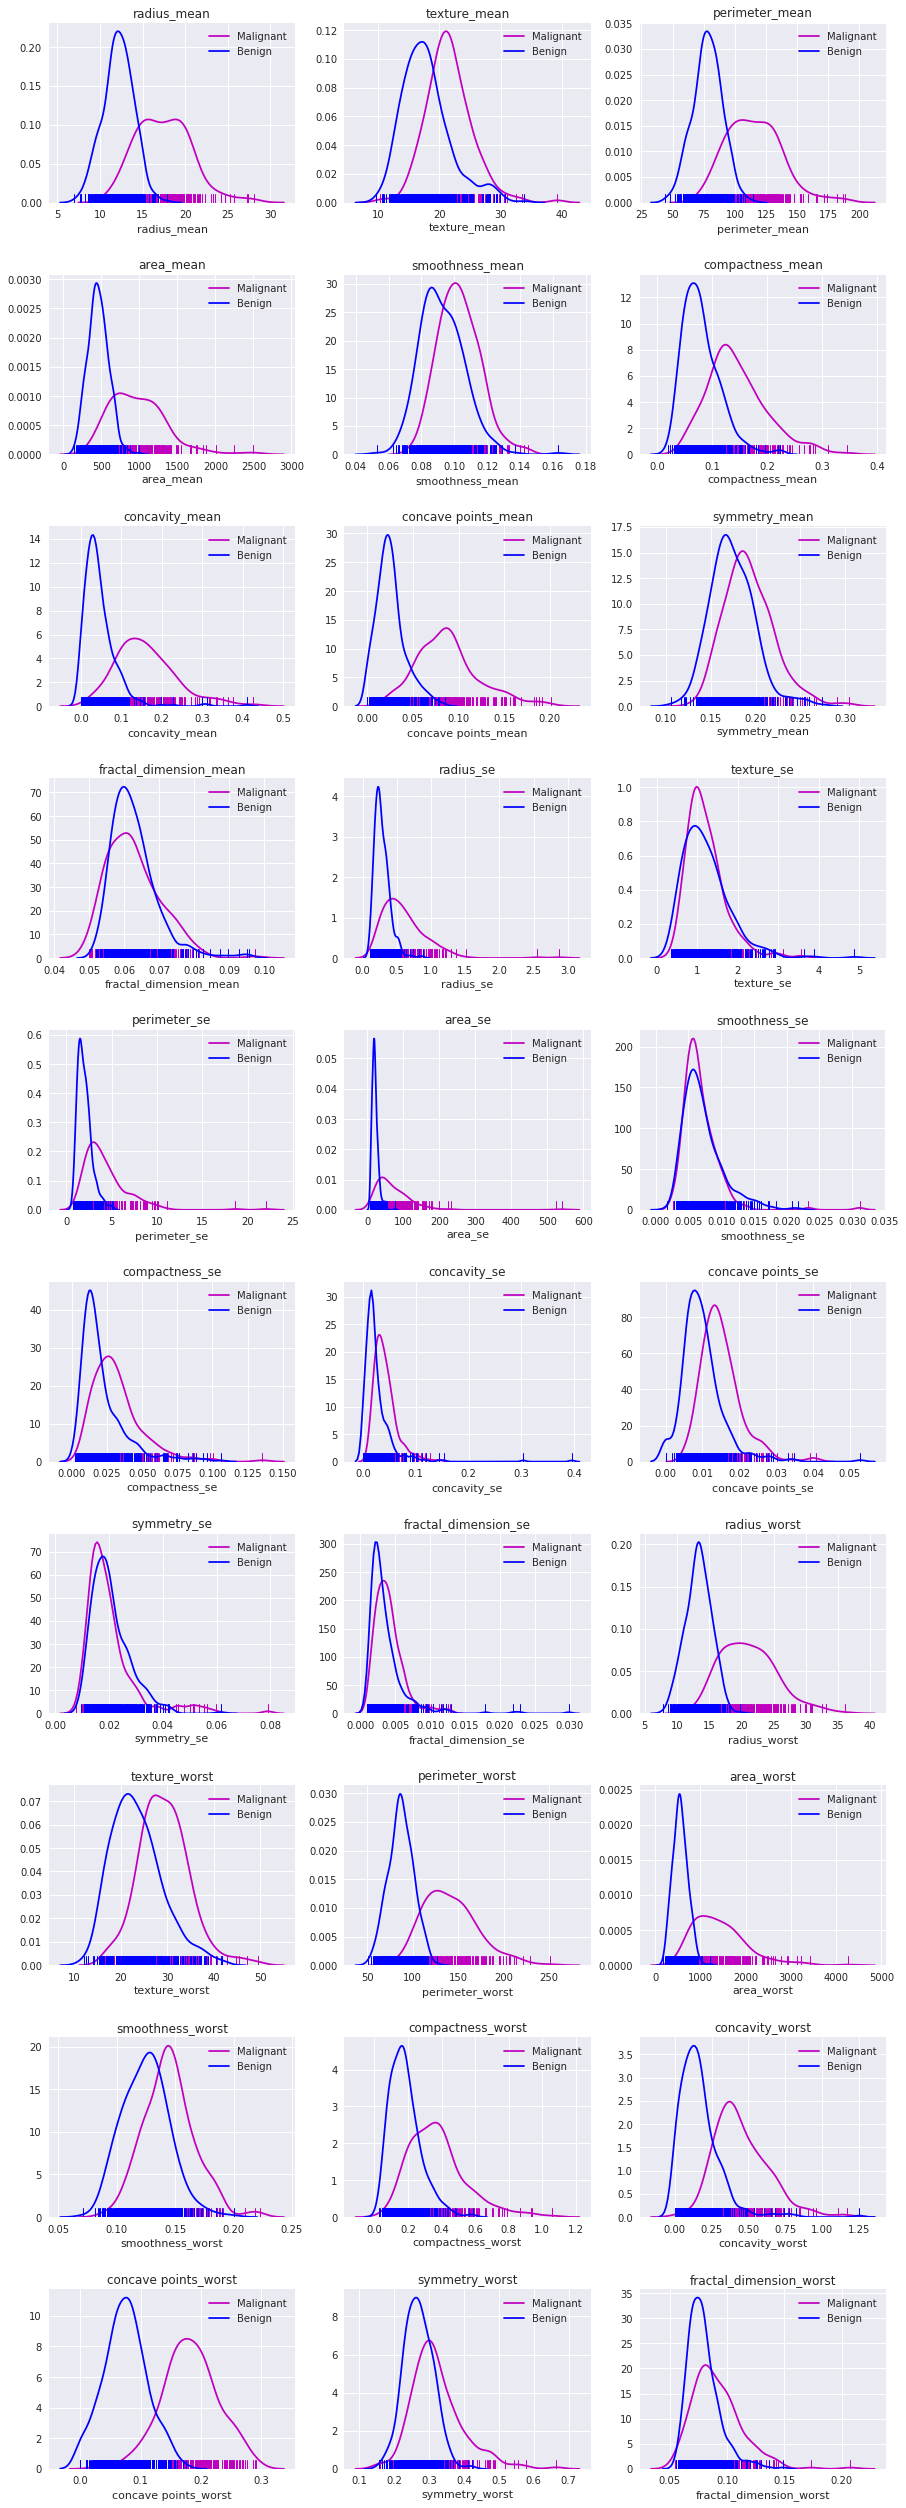

In [18]:
plt.subplots(figsize=(15,45))
sns.set_style('darkgrid')
plt.subplots_adjust (hspace=0.4, wspace=0.2)
i=0
for col in M.columns:
    i+=1
    plt.subplot(10,3,i)
    # first (0th) column of M is diagnosis, non-numerical
    sns.distplot(M[col],color='m',label='Malignant',hist=False, rug=True)
    sns.distplot(B[col],color='b',label='Benign',hist=False, rug=True)
    plt.legend(loc='right-upper')
    plt.title(col) 


### Plotting a Correlation Heatmap
We will explore if and how these features are correlated to one another.

 This is done using heatmap (as shown below). As here we have 30 features to look and compare.

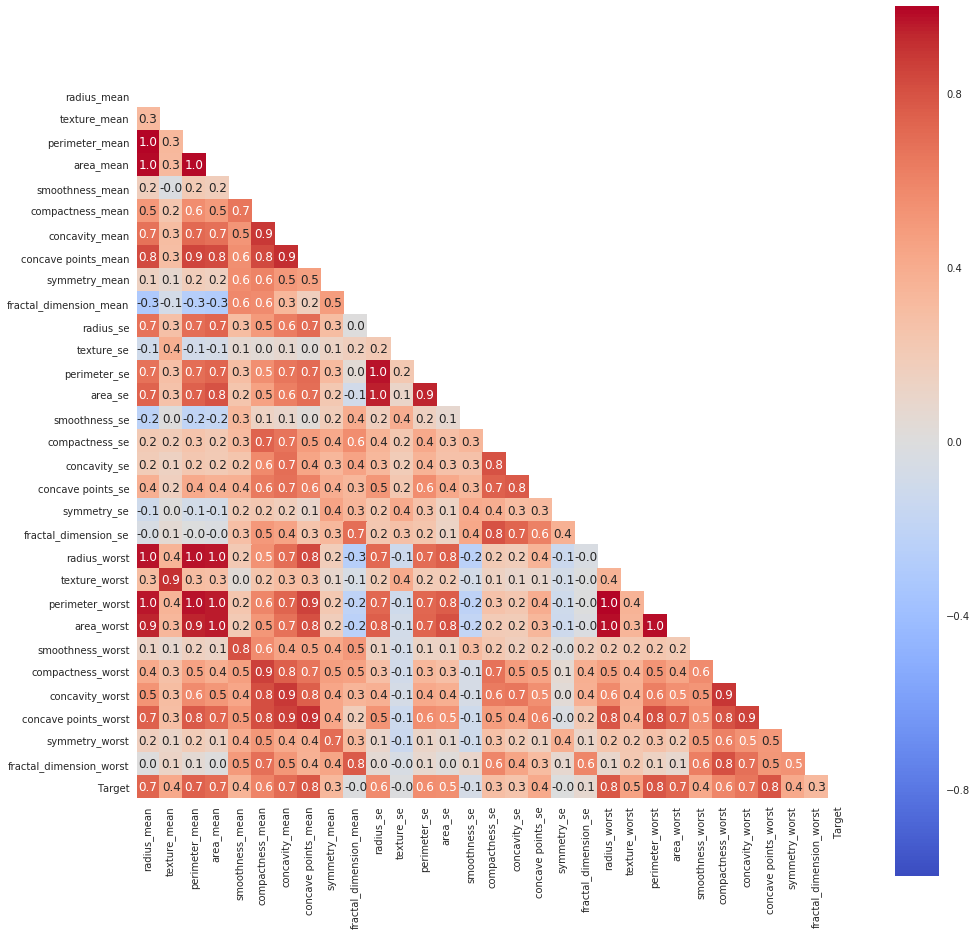

In [14]:
sns.set(style="white")
fig,ax=plt.subplots(figsize=(16,16))
corr=dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,vmin=-1,vmax=1,fmt = ".1f",annot=True,cmap="coolwarm", mask=mask, square=True)

As expected some of the features show complete correlation such as radius_mean, area_mean, perimeter_mean, radius_worst, area_worst and perimeter_worst. Also, texture_mean and texture_worst are correlated. concave points_mean and concavity_mean are very strongly correlated. radius_se, perimeter_se and area_se are strongly correlated. compactness_mean is correlated to concavity_mean, compactness_worst.


In order to avoid high variance that can appear due to many correlated features, we drop some of the very highly correlated features. For example- we have dropped here area_mean, perimeter_mean, radius_worst, area_worst and perimeter_worst while we kept radius_mean. The drop in shape is also checked here. Also, we code Malignant and Benign cases with numbers- 1 and 0 respectively

In [28]:
dataset['diagnosis']=dataset['diagnosis'].map({'M':1,'B':0})
dataset=dataset.drop(['area_mean', 'perimeter_mean', 'radius_worst', 'area_worst', 'perimeter_worst','texture_worst','concavity_mean','perimeter_se', 'area_se'],axis=1)
print(dataset.shape)

(569, 23)


## Data Visualization

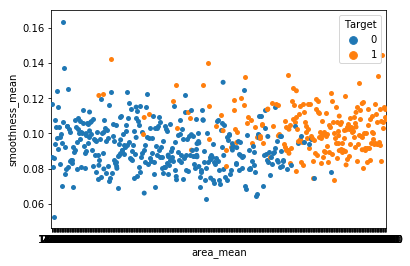

In [19]:
sns.swarmplot(x = 'area_mean', y = 'smoothness_mean', hue = 'Target', data =dataset)


In [22]:
#removing unnecessary columns
dataset = dataset.drop(['id', 'Unnamed: 32'], axis = 1)

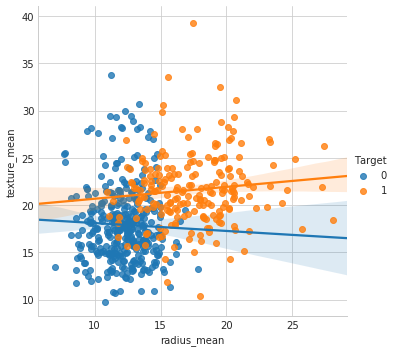

In [24]:
sns.lmplot(x = 'radius_mean', y= 'texture_mean', hue = 'Target',data =dataset)

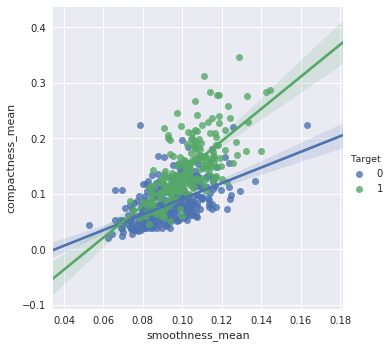

In [29]:
sns.lmplot(x='smoothness_mean', y = 'compactness_mean', data = dataset, hue = 'Target')

### Model Building Evaluation and Hyper-Parameter Tuning 

In [30]:
X= dataset.drop(['diagnosis', 'Target'] ,axis=1)
y= dataset['Target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 8)

## Principal Component Analysis

Before building model one thing that we must work on is to reduce or select the number of features.

For this we will use Principal Component Analysis (PCA). PCA is an approach to obtain a few number of features from a large set. This aids in dimensionality reduction which can otherwise lead to high variance. Before performing PCA, it is crucial to standardize predictors to ensure all features are on the same scale. Otherwise, features that have high variance will influence the outcome of PCA. Here, we first use StandardScaler followed by PCA. Instead of arbitrarily choosing the number of dimension, we choose the number of dimensions that can explain most of the variance (usually 95% of the variance). To do that, we plot 'cumulative explained variance' vs 'number of components'. From this it seems that most of the variance can be explained by 10 components. So, we proceed with that number for PCA.

(0, 22)

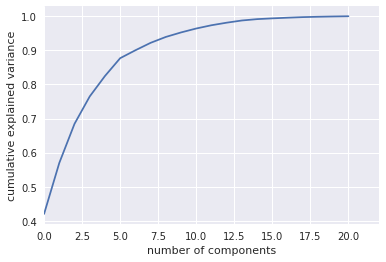

In [32]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
pca=PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,22,2)

In [34]:
pca=PCA(n_components=10)
pca.fit(X_train_std)
X_train_pca=pca.transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
print(X_train_pca.shape)
print(X_test_pca.shape)

(398, 10)
(171, 10)


We begin our best model search by starting with Logistic Regression. We get a high accuracy of 97.5% with a high precision and recall rate of 97.9% and 95.2% respectively.

## Logistic Regression 

In [35]:
logreg=LogisticRegression(random_state=1)
score = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='accuracy'))
p_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='precision'))
r_scores = np.mean(cross_val_score(logreg,  X_train_pca, y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))

Accuracy: 97.49%
Precision : 97.89%
Recall score: 95.21%


Next, we try KNeighborsClassifier. We obtain a high accuracy of 97.24% . Precision and recall are high as well, 98.55% and 91.10%. respectively.

One can also check confusion matrix to check true positive/negative and false positive/negative (as shown below). But for rest of the analysis, I focus on the precision and recall score than confusion matrix.

## K Nearest Neighbour 

In [36]:
knn=KNeighborsClassifier()
scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='accuracy'))
p_scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='precision'))
r_scores = np.mean(cross_val_score(knn,  X_train_pca, y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_scores))
print ('Recall score: %s' % '{:.2%}'.format(r_scores))

X1_train,X1_test,y1_train,y1_test= train_test_split(X_train_pca, y_train,test_size=0.3,random_state=21)
knn.fit(X1_train,y1_train)
y_pred=knn.predict(X1_test)
con=confusion_matrix(y1_test,y_pred)
print('Confusion matrix:')
print(con)

Accuracy: 97.49%
Precision : 98.48%
Recall score: 89.70%
Confusion matrix:
[[72  0]
 [ 4 44]]



### Hyper parameter Tuning using GridSearchCV to figure out the best parameters.
 For knn, we check for the number of neighbors which comes out to be 5.


In [72]:
knn=KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,50)}
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
knn_cv.fit( X_train_pca, y_train)
print(knn_cv.best_params_)

{'n_neighbors': 5}


We then check how the KNeighborsClassifier (knn_cv) with hyperparameters tuning perform on new test sets and compare its performance with knn (without hyperparameter tuning). As, can be seen accuracy and precision improved for knn_cv.

In [73]:
knn_cv=KNeighborsClassifier(n_neighbors= 9)
score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='accuracy'))
p_score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='precision'))
r_score_knn_cv = np.mean(cross_val_score(knn_cv,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for knn_cv: %s" % '{:.2%}'.format(score_knn_cv))
print ('Precision for knn_cv: %s' %'{:.2%}' .format(p_score_knn_cv))
print ('Recall score for knn_cv: %s' % '{:.2%}'.format(r_score_knn_cv))

score_knn = np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='accuracy'))
p_score_knn= np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='precision'))
r_score_knn = np.mean(cross_val_score(knn,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for knn: %s" % '{:.2%}'.format(score_knn))
print ('Precision for knn: %s' %'{:.2%}' .format(p_score_knn))
print ('Recall score for knn: %s' % '{:.2%}'.format(r_score_knn))

Accuracy for knn_cv: 90.64%
Precision for knn_cv: 97.10%
Recall score for knn_cv: 78.79%
Accuracy for knn: 93.57%
Precision for knn: 98.15%
Recall score for knn: 84.85%


### Support Vector Machine 
Next we try one of the most versatile of Supervised Learning Algorithms- Support Vector Machine. Accuracy is 96.23%...Not bad! Also, precision and recall score are high.

In [74]:
svc=SVC(random_state=1)
scores_svc = np.mean(cross_val_score(svc,  X_train_pca, y_train, scoring='accuracy'))
p_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='precision'))
r_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc: %s" % '{:.2%}'.format(scores_svc))
print ('Precision for svc: %s' %'{:.2%}' .format(p_score_svc))
print ('Recall score for svc: %s' % '{:.2%}'.format(r_score_svc))

Accuracy for svc: 97.23%
Precision for svc: 90.56%
Recall score for svc: 92.42%


### We perform hyperparameter tuning for SVC.

In [75]:
svc=SVC(random_state=1)
param_grid = {"C": [0.001,0.1,1,10], 'degree':[1,3,10]}
svc_cv=GridSearchCV(svc,param_grid=param_grid,cv = 3, n_jobs = -1, verbose = 0)
svc_cv.fit(X_train_pca, y_train)
svc_cv.best_params_

{'C': 1, 'degree': 1}

svc_cv is then compared with svc. Both show the same accuracy, precision and recall score.

I speculate that both are equally good for the tests set. The best parameters obtained are C=1, degree=1. The default setting for SVC has C=1, degree=3. Its likely that both degree=1 or 3 are equally good, they just return the lower number. If there is any other explaination then please let me know. For this exercise (for SVC), I stick to deafault settings.

In [77]:
svc_cv= SVC(random_state=1, C=1, degree=1)
score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='accuracy'))
p_score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='precision'))
r_score_svc_cv = np.mean(cross_val_score(svc_cv,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc_cv: %s" % '{:.2%}'.format(score_svc_cv))
print ('Precision for svc_cv: %s' %'{:.2%}' .format(p_score_svc_cv))
print ('Recall score for svc_cv: %s' % '{:.2%}'.format(r_score_svc_cv))

score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='accuracy'))
p_score_svc= np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='precision'))
r_score_svc = np.mean(cross_val_score(svc,  X_test_pca, y_test, scoring='recall'))
print("Accuracy for svc: %s" % '{:.2%}'.format(score_svc))
print ('Precision for svc: %s' %'{:.2%}' .format(p_score_svc))
print ('Recall score for svc: %s' % '{:.2%}'.format(r_score_svc))

Accuracy for svc_cv: 92.98%
Precision for svc_cv: 90.56%
Recall score for svc_cv: 92.42%
Accuracy for svc: 92.98%
Precision for svc: 90.56%
Recall score for svc: 92.42%


## Decision Tree Classifier

In [78]:
dt=DecisionTreeClassifier(random_state=7)
score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='accuracy'))
p_score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='precision'))
r_score_dt = np.mean(cross_val_score(dt,  X_train_pca, y_train, scoring='recall'))
print("Accuracy for Decision Tree: %s" % '{:.2%}'.format(score_dt))
print ('Precision Decision Tree: %s' %'{:.2%}' .format(p_score_dt))
print ('Recall score Decision Tree: %s' % '{:.2%}'.format(r_score_dt))

Accuracy for Decision Tree: 90.70%
Precision Decision Tree: 86.53%
Recall score Decision Tree: 89.02%


## Random Forest Classifier

They show better accuracy, precision and recall score than Decision Trees.

In [79]:
rf=RandomForestClassifier(random_state=21)
score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='accuracy'))
p_score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='precision'))
r_score_rf = np.mean(cross_val_score(rf,  X_train_pca, y_train, scoring='recall'))
print("Accuracy for RandomForest: %s" % '{:.2%}'.format(score_rf))
print ('Precision RandomForest:: %s' %'{:.2%}' .format(p_score_rf))
print ('Recall score RandomForest:: %s' % '{:.2%}'.format(r_score_rf))

Accuracy for RandomForest: 94.47%
Precision RandomForest:: 94.30%
Recall score RandomForest:: 90.41%


### Parameter Tuning the RandomForest's parameters and check if we get any improvement.

In [80]:
param_grid = {'max_depth': [80, 90, 100, 110],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12],
              'n_estimators': [100, 200, 300, 1000]}
# Create a basic model
rf = RandomForestClassifier(random_state=21)
# Instantiate the grid search model
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
rf_cv.fit(X_train_pca, y_train)
print(rf_cv.best_params_)
score=rf_cv.best_score_
print("Accuracy: %s" % '{:.2%}'.format(score))

{'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
Accuracy: 95.48%




### Comparing the Performance of  rf_cv with rf on test set. rf_cv show better accuracy than rf.

In [62]:
rf_cv=RandomForestClassifier(random_state=21,max_depth= 80, max_features= 3,min_samples_leaf= 5, 
                          min_samples_split=8,n_estimators= 100)
score_rf_cv = np.mean(cross_val_score(rf_cv,  X_test_pca, y_test, scoring='accuracy'))
print("Accuracy for rf_cv: %s" % '{:.2%}'.format(score_rf_cv))

score_rf = np.mean(cross_val_score(rf,  X_test_pca, y_test, scoring='accuracy'))
print("Accuracy for rf: %s" % '{:.2%}'.format(score_rf))

Accuracy for rf_cv: 90.39%
Accuracy for rf: 90.91%


## Voting Classifier

Next, we try if combining some/all of these algorithms can improve accuracy score. Here, in this ensemble method, we now aggregate the predictions from all the classifiers. This helps in predicting the class that gets the majority vote. Such way of voting is called 'Hard voting'. The combined score is less than the accuracy score of LogisticRegression- 97.49% . To get a better score, we move to 'Soft voting'.

In [81]:
logreg=LogisticRegression(random_state=1)
knn_cv=KNeighborsClassifier(n_neighbors= 9)
svc=SVC(random_state=1)
dt=DecisionTreeClassifier(random_state=7)
rf_cv=RandomForestClassifier(random_state=21,max_depth= 80, max_features= 3,min_samples_leaf= 5, 
                          min_samples_split=8,n_estimators= 100)

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('logreg',logreg),('knn_cv', knn_cv), ('rf_cv', rf_cv), ('dt',dt), ('svc', svc)], voting='hard')
score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='accuracy'))
print("Accuracy : %s" % '{:.2%}'.format(score))

Accuracy : 97.24%


### Soft voting' is another way of voting classifier. 

In this case instead of prediting the class based on majority votes, class probabilities are aggregated and the class is predicted based on the class that gets highest class probability on averaged over all the classifiers. 

This type of voting usually achieves higher performance than hard voting. An important thing to remember is that soft voting only works with classifiers that can predict probabilities or have predict_proba function. To perform, soft voting we have to turn SVC's probability to True.

Accuracy reduces to 96.73% if we include all the classifiers. But it increases to 98.24% if we only consider LogisticRegression, SVC,RandomForest. FYI-if I use the same 3 classifiers and perform hard voting, accuracy remains 96.98%.

In [1]:
svc=SVC(random_state=1,probability=True)

voting_clf = VotingClassifier(estimators=[('logreg',logreg), ('rf_cv', rf_cv),  ('svc', svc)], voting='soft')
score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='accuracy'))
p_score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='precision'))
r_score = np.mean(cross_val_score(voting_clf,  X_train_pca, y_train, scoring='recall'))
print("Accuracy : %s" % '{:.2%}'.format(score))
print ('Precision : %s' %'{:.2%}' .format(p_score))
print ('Recall :: %s' % '{:.2%}'.format(r_score))

NameError: name 'SVC' is not defined

### Conclusion

Using feature selection and voting classifier we could achieve a high accuracy of 98.24%. In addition, we achieved high Precision and Recall of 99.29% and 95.89%, respectively.

## Advanced Modelling

## K Nearest Neighbour

In [31]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9627659574468085

In [32]:
# Performming Cross Validation

neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1,51,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
 

The Optimal Number of Neighbours is 13 


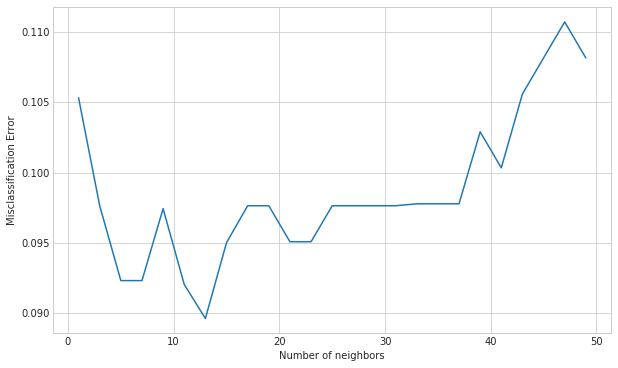

In [34]:


# Misclassification Error Versus K

MSE = [1-x for x in cv_scores]



# Determine the Best K

optimal_k = neighbors[MSE.index(min(MSE))]
print('The Optimal Number of Neighbours is %d ' %optimal_k)


# Plotting the Misclassification Error Versus K

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()
